# Baseball Player Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [2]:
players  = pd.read_csv("./data/baseballPlayers.csv")
players.head()

,Player,Year,Team,Pos,G,AB,R,H,B2,B3,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,"Wilson, H",1930,CHC,OF,155,585,146,208,35,6,56,191,105,84.0,3,NaN,0.356,0.454,0.723,1.177
1,"Gehrig, L",1931,NYY,1B,155,619,163,211,31,15,46,184,117,56.0,17,12.0,0.341,0.446,0.662,1.108
2,"Greenberg, H",1937,DET,1B,154,594,137,200,49,14,40,183,102,101.0,8,3.0,0.337,0.436,0.668,1.105
3,"Foxx, J",1938,BOS,1B,149,565,139,197,33,9,50,175,119,76.0,5,4.0,0.349,0.462,0.704,1.166
4,"Gehrig, L",1927,NYY,1B,155,584,149,218,52,18,47,175,109,84.0,10,8.0,0.373,0.474,0.765,1.240


The variable Pos in the players table contains each player's position.
- 1B: First Base
- 2B: Second Base
- 3B: Third Base
- SS: Short Stop 
- C: Catcher
- LF: Left Field
- CF: Center Field
- RF: Right Field
- OF: Outfield (general)
- DH: Designated Hitter

In [3]:
map_dict = {}
for x in players.Pos:
    if x in ["OF", "LF", "CF", "RF"]:
        map_dict[x] = "OF"
    else:
        map_dict[x] = x

players["Pos"] = players["Pos"].map(map_dict).astype('category')

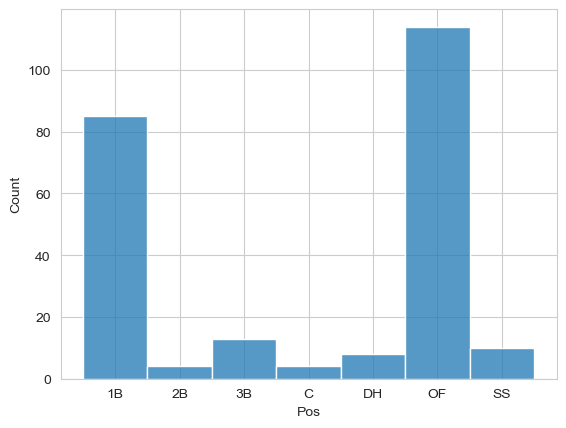

In [4]:
plt.figure()
sns.histplot(players.Pos)
plt.show()

Runs created is a statistic used in baseball to estimate the number of team runs an individual contributed to.

RC = A X B / C

A = H + BB

B = TB

C = AB + BB

The variables H (hits), BB (base on balls), and AB (at bat) are all in players.
TB (total bases) must be caculated from other variables found in players.

TB = H + B2 + 2*B3 + 3*HR

The variables B2 (double, more commonly abbreviated as “2B”), B3 (triple, more commonly abbreviated as “3B”), and HR (homerun) are all in players.

In [5]:
players["TB"] = players.H + players.B2 + 2*players.B3 + 3*players.HR
players["RC"] = (players.H + players.BB) * players.TB / (players.AB + players.BB)

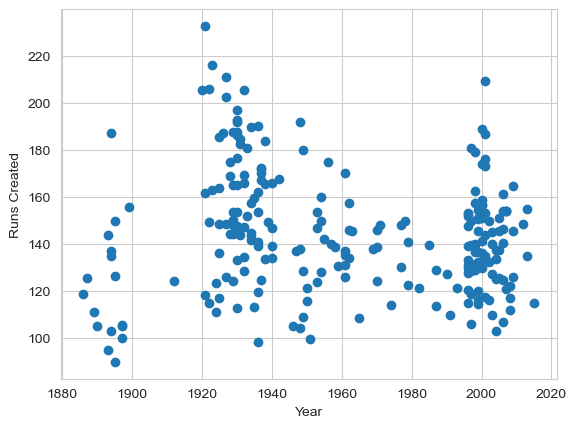

In [6]:
plt.figure()
plt.scatter(players.Year, players.RC)
plt.xlabel("Year")
plt.ylabel("Runs Created")
plt.show()

The “live-ball era” started in 1920. Many factors around this time contributed to increased hitting statistics.

In [7]:
lbEra = players.Year >= 1920
lbPlayers = players.loc[lbEra, :]

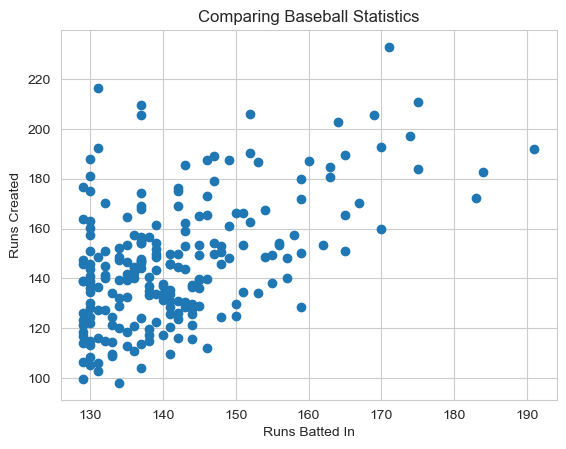

In [8]:
plt.figure()
plt.scatter(lbPlayers.RBI, lbPlayers.RC)
plt.xlabel("Runs Batted In")
plt.ylabel("Runs Created")
plt.title("Comparing Baseball Statistics")
plt.show()

In [9]:
c = np.polyfit(lbPlayers.RBI, lbPlayers.RC, 1)
RBIfit = (min(lbPlayers.RBI), max(lbPlayers.RBI))
RCfit = np.polyval(c, RBIfit)

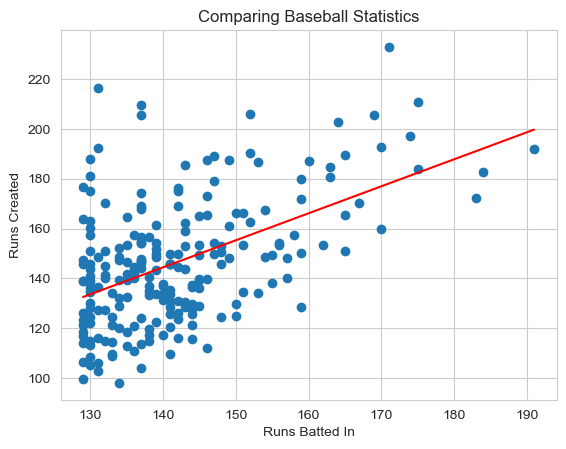

In [10]:
plt.figure()
plt.plot(RBIfit, RCfit, color='red')
plt.scatter(lbPlayers.RBI, lbPlayers.RC)
plt.xlabel("Runs Batted In")
plt.ylabel("Runs Created")
plt.title("Comparing Baseball Statistics")
plt.show()